In [1]:
import duckdb
from market_streaming.domain.models import MarketTick

# Connect to db

In [2]:
from pathlib import Path
PROJECT_ROOT = Path.cwd().parents[0]  # adjust if you launch Jupyter from root
DB_PATH = PROJECT_ROOT / "data" / "market_data.duckdb"

con = duckdb.connect(str(DB_PATH))
con.execute("SELECT * FROM market_ticks LIMIT 10").fetchdf()

,ts,symbol,price,volume
0,2025-12-01 09:00:00,SP500,4710.04,323264
1,2025-12-01 09:05:00,SP500,4718.01,375005
2,2025-12-01 09:10:00,SP500,4649.09,381444
3,2025-12-01 09:15:00,SP500,4641.73,341846
4,2025-12-01 09:20:00,SP500,4704.77,202593
5,2025-12-01 09:25:00,SP500,4722.25,381851
6,2025-12-01 09:30:00,SP500,4651.30,264484
7,2025-12-01 09:35:00,SP500,4704.39,268830
8,2025-12-01 09:40:00,SP500,4734.95,347637
9,2025-12-01 09:45:00,SP500,4650.66,457487


In [3]:
con.execute("""
    SELECT symbol, COUNT(*) AS n_rows
    FROM market_ticks
    GROUP BY symbol
    ORDER BY n_rows DESC
""").fetchdf()

,symbol,n_rows
0,NIKKEI225,150
1,SP500,150
2,STOXX600,150


# Simple query on db

In [4]:
import pandas as pd

symbol = "NIKKEI225"  # choose one that exists in your data

df_price = con.execute(f"""
    SELECT ts, price
    FROM market_ticks
    WHERE symbol = '{symbol}'
    ORDER BY ts
""").fetchdf()

df_price["ts"] = pd.to_datetime(df_price["ts"])
df_price.head()


,ts,price
0,2025-12-01 09:00:00,4025.38
1,2025-12-01 09:05:00,4040.88
2,2025-12-01 09:10:00,4013.67
3,2025-12-01 09:15:00,3972.55
4,2025-12-01 09:20:00,3991.87


# Plot price for a symbol

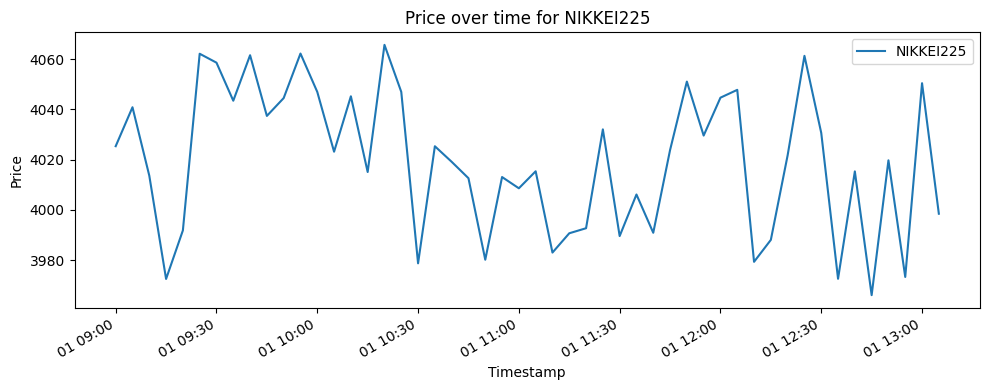

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df_price["ts"], df_price["price"], label=symbol)

plt.title(f"Price over time for {symbol}")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.xticks(rotation=30, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

# More advanced plotting: rolling average

In [6]:
# 5-point rolling average of price
df_price = df_price.sort_values("ts")
df_price["price_rolling_5"] = df_price["price"].rolling(window=5, min_periods=1).mean()

df_price[["ts", "price", "price_rolling_5"]].head()

,ts,price,price_rolling_5
0,2025-12-01 09:00:00,4025.38,4025.380000
1,2025-12-01 09:05:00,4040.88,4033.130000
2,2025-12-01 09:10:00,4013.67,4026.643333
3,2025-12-01 09:15:00,3972.55,4013.120000
4,2025-12-01 09:20:00,3991.87,4008.870000


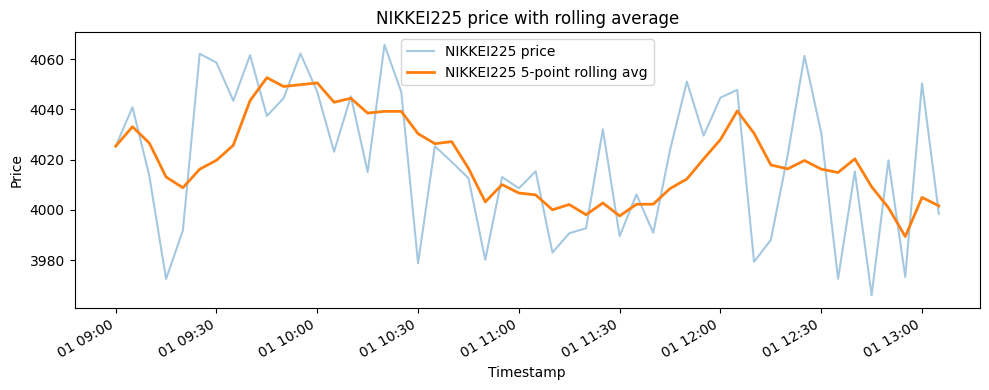

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(df_price["ts"], df_price["price"], label=f"{symbol} price", alpha=0.4)
plt.plot(df_price["ts"], df_price["price_rolling_5"], label=f"{symbol} 5-point rolling avg", linewidth=2)

plt.title(f"{symbol} price with rolling average")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.xticks(rotation=30, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
con.close()